# Creating ERA5 topographic information

In [15]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import cartopy
import os
import pandas as pd
import cftime
import datetime as dt
import tqdm
import netCDF4 as nc
import glob

import subprocess
import cftime

In [17]:
tp_type = 'TP'
tp_type = 'MTPR'
tp_type = 'ALL'

In [18]:
# in_file = '/localdrive/drive6/era5/data/six_hrly/data_1deg/invariants_100.nc'
# out_file = f'/localdrive/drive10/jj/mdtf/inputdata/model/ERA5.{tp_type}.DEG10.001/topo.nc'

in_file = '/localdrive/drive6/era5/data/six_hrly/data_1_5deg/invariants_150.nc'
out_file = f'/localdrive/drive10/jj/mdtf/inputdata/model/ERA5.{tp_type}.DEG15.001/topo.nc'

print(os.path.exists(in_file))

True


In [19]:
ds = xr.open_dataset(in_file)
ds = ds.rename({'z': 'hgt', 'lsm': 'lsm'})
ds['hgt'] = ds['hgt']/9.8
ds.hgt.attrs['units'] = 'm'
ds.hgt.attrs['long_name'] = 'surface_height_from_geopotential'
ds.hgt.attrs['standarad_name'] = 'surface_height'

ds['lsm'] = ds.lsm.isel(time=0)
ds['hgt'] = ds.hgt.isel(time=0)

ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})
ds = ds.drop('time', dim=None)
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 240)
Coordinates:
  * lon      (lon) float32 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * lat      (lat) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
Data variables:
    hgt      (lat, lon) float32 -0.0061782524 -0.0061782524 ... 2791.299
    lsm      (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-10 05:51:02 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [20]:
ds.to_netcdf(out_file)

In [12]:
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 240, time: 1)
Coordinates:
  * lon      (lon) float32 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * lat      (lat) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * time     (time) datetime64[ns] 2000-01-01
Data variables:
    hgt      (lat, lon) float32 -0.0061782524 -0.0061782524 ... 2791.299
    lsm      (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-10 05:51:02 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


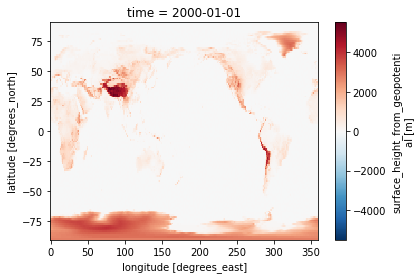

In [45]:
ds.hgt.plot()

In [41]:
print(ds.hgt.shape)

(1, 121, 240)
